<a href="https://colab.research.google.com/github/AlexanderAvocone/Project/blob/master/Vergleich_mit_Modellfunktion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Rechnernutzung Übungsaufgabe 4:**
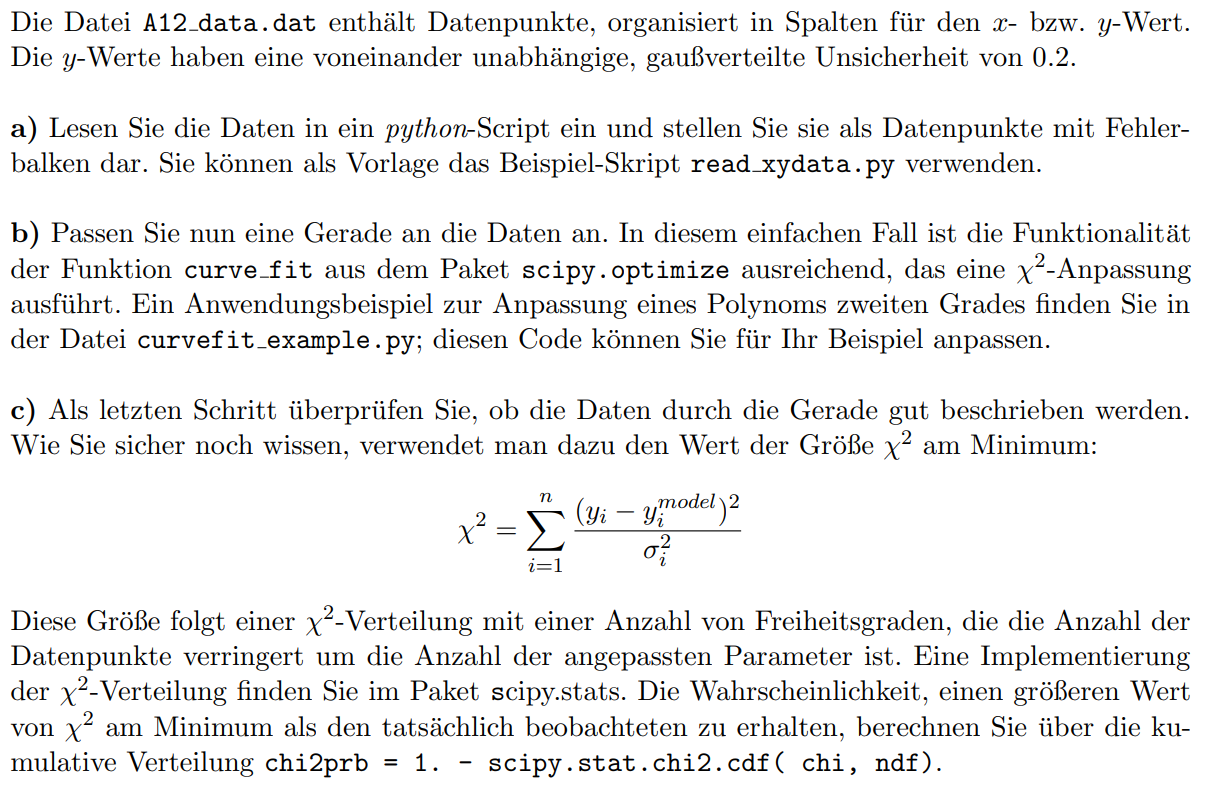

#**a) und b)**

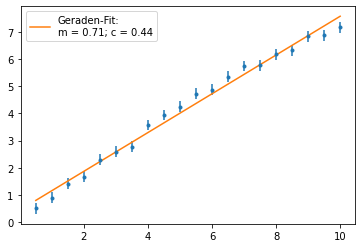

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit

def gerade(x,a,b):
  return a*x+b

data = pd.read_csv("A12_data.dat", header = None, sep = "  ", engine = "python")

#curve_fit
x_wert = np.arange(0,10,0.1)
fit,pcov = curve_fit(gerade, data[0], data[1], p0 = [1,0])

sigma = 0.2   #Vorgegebene Unsicherheit
plt.errorbar(data[0], data[1], yerr=sigma, fmt =".")
plt.plot(data[0],gerade(data[0],*fit),label =("Geraden-Fit:\nm = {0:3.2f}; c = {1:3.2f}".format(fit[0],fit[1])))
plt.legend()


#**c)**

In [2]:
i = 0
xx = 0
#chi-squared
while i < len(data):
  xx = (data.iloc[i,1] - gerade(data.iloc[i,0],*fit))**2/sigma**2 +xx
  i+=1

chi = np.sqrt(xx)

dof = len(data)-1 #degrees of freedom = N - 1 


chi2prb = 1. - stats.chi2.cdf(chi,dof)
print("Die Wahrscheinlichkeit, dass Chi^2 größer ist als",chi**2, "beträgt ",chi2prb*100,"%.")



Die Wahrscheinlichkeit, dass Chi^2 größer ist als 27.47218045112779 beträgt  99.9199356539052 %.


Dass $\chi^2$ deutlich verbessert werden kann liegt an der vorgegebenen Messunsicherheit von $\sigma = 0.2$. Je kleiner die Messunsicherheit, desto größer wird $\chi^2$.